# グラフ上の量子ウォーク

## グラフの準備
サンプルとしてMutag dataset[1] を用いる

[1]Debnath, A. K., Lopez de Compadre, R. L., Debnath, G., Shusterman, A. J., Hansch, C.: Structure-activity relationship of mutagenic aromatic and heteroaromatic nitro compounds. correlation with molecular orbital energies and hydrophobicity, Journal of Medicinal Chemistry, 34(2), 786-797 (1991) http://pubs.acs.org/doi/abs/10.1021/jm00106a046.

In [1]:
from grakel import datasets
data_name = 'MUTAG'
Data = datasets.fetch_dataset(data_name, verbose=False)

/Users/parton/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import numpy as np
data_x, data_y = np.array(Data.data), np.array(Data.target)

Mutagのグラフは以下のようにエッジとして保存されている

In [3]:
print(data_x[0][0])

{(15, 13), (10, 11), (5, 6), (9, 8), (2, 1), (14, 13), (8, 9), (15, 16), (1, 6), (14, 9), (17, 15), (1, 2), (11, 10), (13, 12), (12, 13), (16, 15), (3, 4), (10, 9), (4, 10), (3, 2), (5, 4), (9, 14), (10, 4), (4, 5), (13, 15), (9, 10), (7, 5), (2, 3), (8, 7), (12, 11), (11, 12), (6, 5), (15, 17), (13, 14), (6, 1), (5, 7), (4, 3), (7, 8)}


In [4]:
mutag_data = list(data_x[0][0])

### サンプルの可視化

## グラフ上量子ウォークの量子回路化
手法の詳細は[circuit_tutorial](https://github.com/qwqmlf/QC4QWG/blob/master/circuit_tutorial.ipynb)を参照のこと

In [5]:
from QC4QWG import *
import scipy as sp
import networkx as nx
G= nx.Graph()
G.add_edges_from(mutag_data)

qc1 =QC4QWG(G,1)

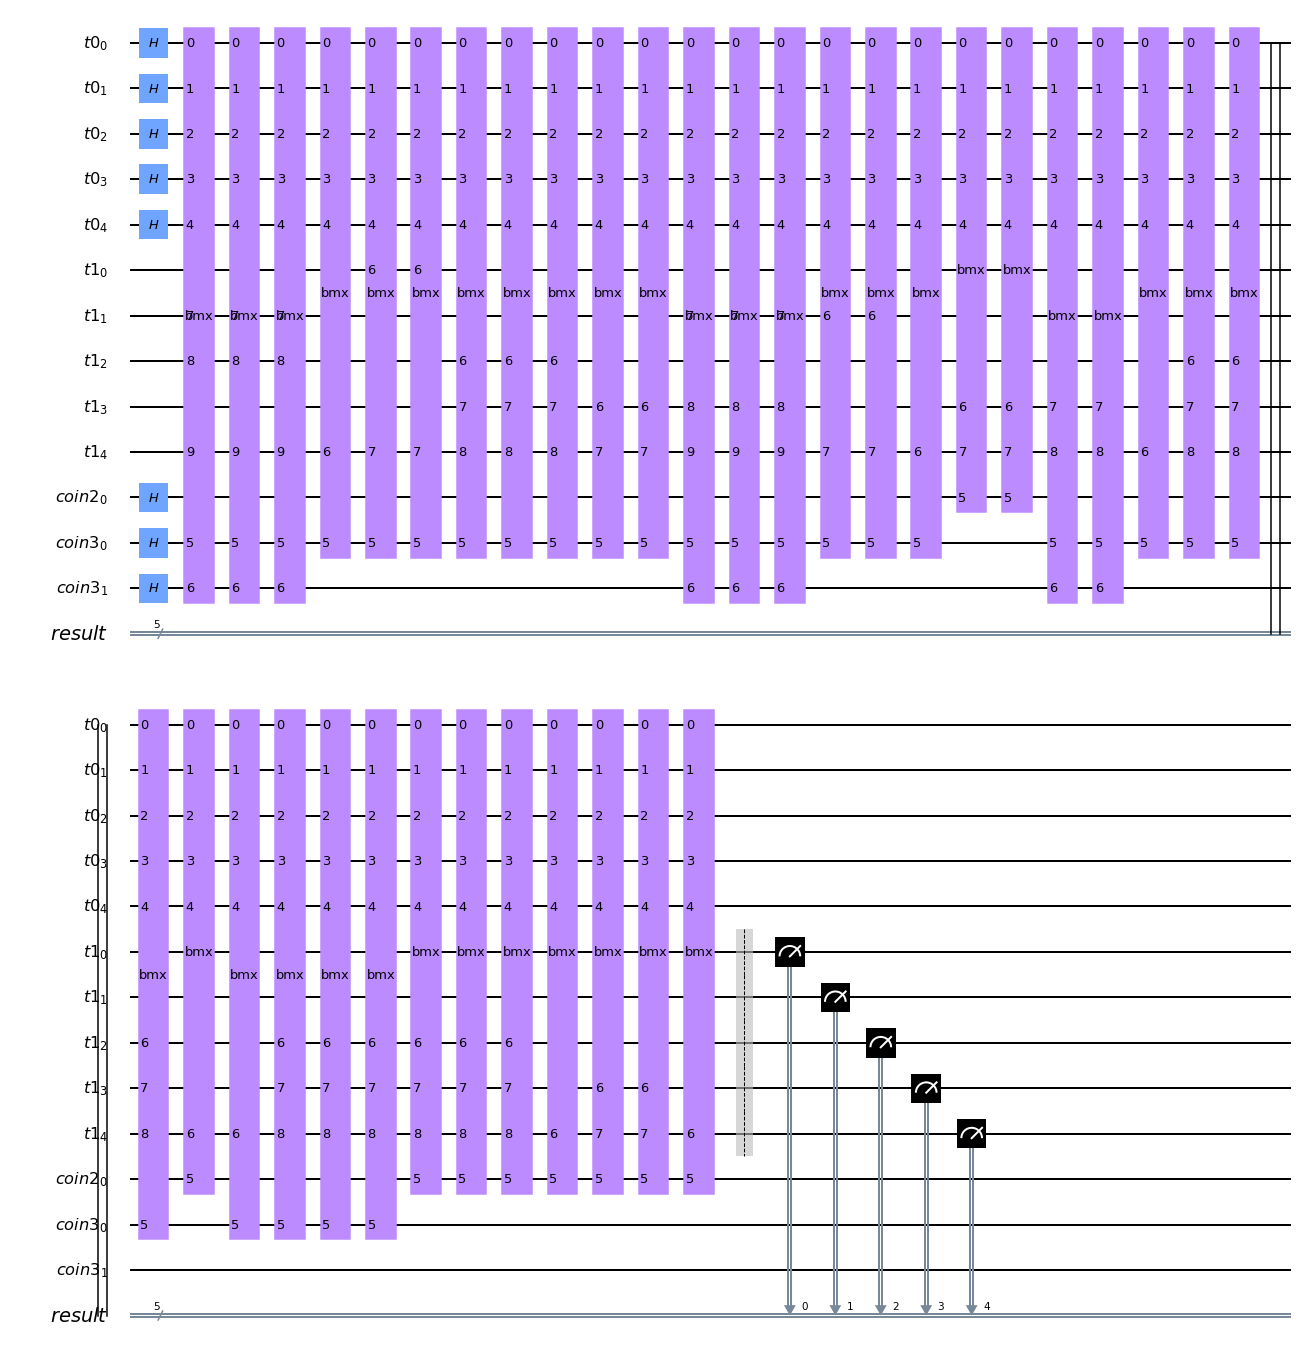

In [6]:
qc1.draw(output = 'mpl')

In [7]:
gates = qc1.count_ops()
print(gates)

OrderedDict([('bmx', 37), ('h', 8), ('measure', 5), ('barrier', 1)])


In [8]:
from qiskit import IBMQ
from qiskit import execute
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc1, backend, shots=1024)
result = job.result()
count =result.get_counts()
print(count)

{'00000': 939, '00110': 16, '10000': 10, '11100': 23, '01100': 36}


なお、0,1,...n stepまで確率分布の変遷をみるためにfootprint(G, step)関数がある。

In [9]:
counts = footprint(G,3)

Credentials are already in use. The existing account in the session will be replaced.


QC4QWG(G,0)
Job Status: job has successfully run
QC4QWG(G,1)
Job Status: job has successfully run
QC4QWG(G,2)
Job Status: job has successfully run
QC4QWG(G,3)
Job Status: job has successfully run


In [10]:
print(counts)

[{'10011': 33, '11001': 34, '11111': 26, '00010': 36, '10001': 26, '10010': 26, '10110': 33, '10000': 31, '01011': 27, '11110': 34, '01100': 43, '01010': 33, '01101': 37, '00100': 38, '00101': 34, '00000': 29, '00001': 39, '11011': 23, '11000': 21, '11100': 23, '10100': 43, '00111': 27, '10111': 26, '01001': 32, '10101': 33, '01110': 28, '00110': 44, '00011': 30, '11101': 26, '11010': 28, '01000': 25, '01111': 32}, {'00000': 915, '00110': 17, '10000': 5, '11100': 18, '01100': 45}, {'00000': 1000}, {'00000': 1000}]


入力を
ステップ数: $S$
頂点数: $V$
辺数: $E$
とする。
ゲートの数は制御量子ビットの数がNの一般化されたToffoli ゲートを CNXと表記すると、
$SE$個の$(C(2\log_2{V})X)$で回路は実現される。

Mutagデータセットだと、平均次数は4で、コインにおおよそ3~4量子ビット程度、探索空間に$(S+1)log_2{V}$量子ビット程度必要である。
$V$はおおよそ$2^{4}$から$2^{6}$程度であるから、おおよそ$5S+4$量子ビット程度で計算できる。